In [71]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
np.random.seed(0)

In [10]:
np.random.normal()

0.9787379841057392

In [14]:
np.random.choice(8)

2

In [16]:
bool(1)

True

In [52]:
p=0.5
bernoulli = stats.bernoulli(p)
stats.bernoulli(p).rvs()

1

In [51]:
if 1: print('ok')

ok


In [34]:
def distribution1():
    p=0.5
    bernoulli = stats.bernoulli(p)
    if bernoulli.rvs():
        return distribution1_0(), 'traffic_jam'
    else:
        return distribution1_1(),'normal_traffic'

In [117]:
def distribution1_0():
    """Distribution of traffic_jam."""
    p=0.5
    bernoulli = stats.bernoulli(p)
    if bernoulli.rvs():
        return stats.norm.rvs(loc=-3,scale=0.6)
    else:
        return stats.norm.rvs(loc=1,scale=1)

In [118]:
def distribution1_1():
    """Distribution of normal_traffic."""
    p=0.5
    bernoulli = stats.bernoulli(p)
    if bernoulli.rvs():
        return stats.norm.rvs(loc=-1,scale=0.8)
    else:
        return stats.norm.rvs(loc=3,scale=1.3)

In [119]:
def sample(distribution,n):
    return [distribution1() for i in range(n)]

In [126]:
samples = sample(distribution1,2000)

In [127]:
df = pd.DataFrame(samples,columns=['coordinates','traffic_status'])

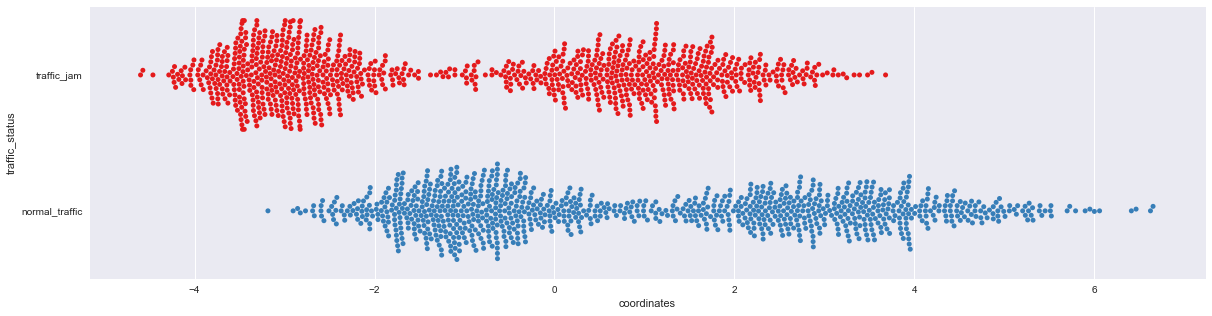

In [130]:
plt.figure(figsize=(20,5))
sns.swarmplot(x='coordinates',y='traffic_status',data=df,palette="Set1")